# Kaggle Tabular Classification Project
## Mushroom Classification

### Project Overview
This project involves classifying mushrooms as edible or poisonous based on their features. The dataset is sourced from Kaggle and contains categorical features describing various properties of mushrooms.

### Data Loading and Initial Look
In this section, we will load the dataset, examine its structure, and perform a preliminary analysis to understand the data.

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("mushrooms.csv")

# Display the first few rows
df.head()

/home/tsion_w/.local/lib/python3.10/site-packages/numpy/_core/getlimits.py:548: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Step 2: Count the Number of Rows and Features
In this step, we will count the number of rows (data points) and columns (features) in the dataset to understand its size and structure. This provides an overview of the data we're working with.

In [2]:
# Count the number of rows and columns in the dataset
num_rows, num_columns = df.shape

print(f"Number of rows (data points): {num_rows}")
print(f"Number of columns (features): {num_columns}")

Number of rows (data points): 8124
Number of columns (features): 23


## Step 3: Check for Missing Values
In this step, we will check if the dataset contains any missing values. Missing values can affect the performance of machine learning models, so identifying them is a important preprocessing step.

In [3]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values, if any
print("Missing values in each column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found in the dataset.")

Missing values in each column:
No missing values found in the dataset.


## Feature Analysis Table

We will create a table to summarize the following details for each feature:
1. Whether the feature is categorical or numerical.
2. The possible values for each feature (categories or range).
3. The number of missing values.
4. Whether there are outliers in the feature (if applicable).
5. Definition of outlier: An outlier is a data point that significantly deviates from the distribution of the data. For categorical features, it may be rare categories. For numerical features, it may be values far from the typical range.

In [4]:
# Summary table creation
import pandas as pd
# Create a list to store the feature analysis
feature_analysis = []

# Iterate over columns
for column in df.columns:
    # Identify categorical or numerical
    if df[column].dtype == 'object':
        feature_type = 'Categorical'
        values = df[column].unique()
    else:
        feature_type = 'Numerical'
        values = f"{df[column].min()} to {df[column].max()}"
    
    # Count missing values
    missing_values = df[column].isnull().sum()
    
    # Append feature analysis to the list
    feature_analysis.append({
        'Feature': column,
        'Type': feature_type,
        'Values': values,
        'Missing Values': missing_values
    })

# Create a DataFrame from the feature analysis list
feature_table = pd.DataFrame(feature_analysis)

# Display the table
feature_table

,Feature,Type,Values,Missing Values
0,class,Categorical,"[p, e]",0
1,cap-shape,Categorical,"[x, b, s, f, k, c]",0
2,cap-surface,Categorical,"[s, y, f, g]",0
3,cap-color,Categorical,"[n, y, w, g, e, p, b, u, c, r]",0
4,bruises,Categorical,"[t, f]",0
5,odor,Categorical,"[p, a, l, n, f, c, y, s, m]",0
6,gill-attachment,Categorical,"[f, a]",0
7,gill-spacing,Categorical,"[c, w]",0
8,gill-size,Categorical,"[n, b]",0
9,gill-color,Categorical,"[k, n, g, p, w, h, u, e, b, r, y, o]",0


### Checking for Class Imbalance
In this step, we analyze the target feature (`class`) to check if the dataset is balanced or imbalanced. Class imbalance occurs when the number of samples in one class is significantly higher than in another, which can affect the performance of machine learning models.

In [5]:
# Count occurrences of each class in the target feature
class_counts = df['class'].value_counts()

# Display the class distribution
print("Class distribution:")
print(class_counts)

# Calculate the percentage distribution
class_percentage = class_counts / len(df) * 100
print("\nClass distribution (percentage):")
print(class_percentage)

Class distribution:
class
e    4208
p    3916
Name: count, dtype: int64

Class distribution (percentage):
class
e    51.797144
p    48.202856
Name: count, dtype: float64


### Target Variable: Encoding and Range
For this classification task, the target variable is the `class` column. We will determine how the target is encoded and ensure it is correctly formatted for machine learning purposes.

In [6]:
# Check the unique values of the target variable (class column)
target_values = df['class'].unique()
print(f"Unique values in the target column: {target_values}")

# Display encoding details
print("Target Encoding:")
if set(target_values) == {'e', 'p'}:
    print("'e' represents Edible and 'p' represents Poisonous.")
else:
    print("Check for additional encodings.")

Unique values in the target column: ['p' 'e']
Target Encoding:
'e' represents Edible and 'p' represents Poisonous.


# Data Visualization for Classification

For this step, we will:
1. Generate histograms for each categorical feature to compare their distribution between the two classes (`Edible` and `Poisonous`).
2. Create tables where necessary for categorical features to summarize the class distribution more clearly.
3. Comment on features that appear most promising for the machine learning task, based on the visualizations.

This step helps us understand the dataset better and identify potential features useful for classification.

In [7]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


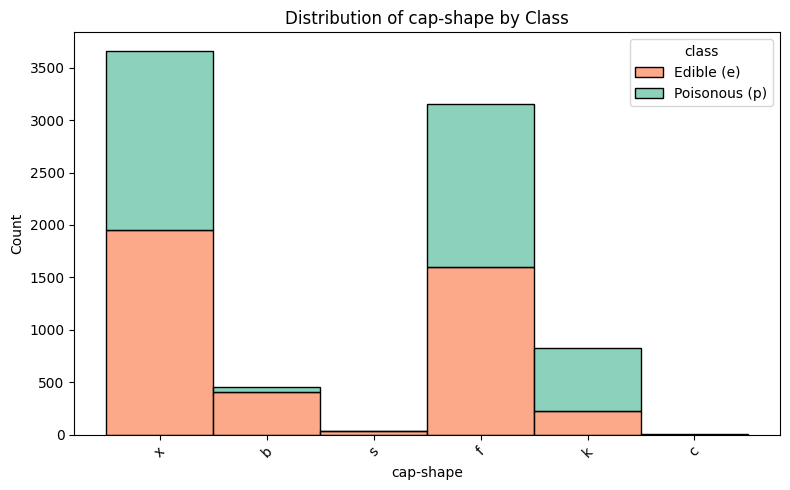

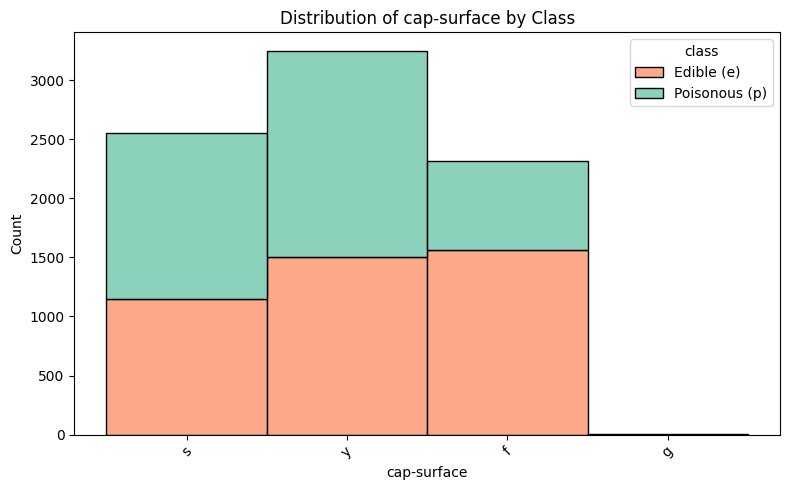

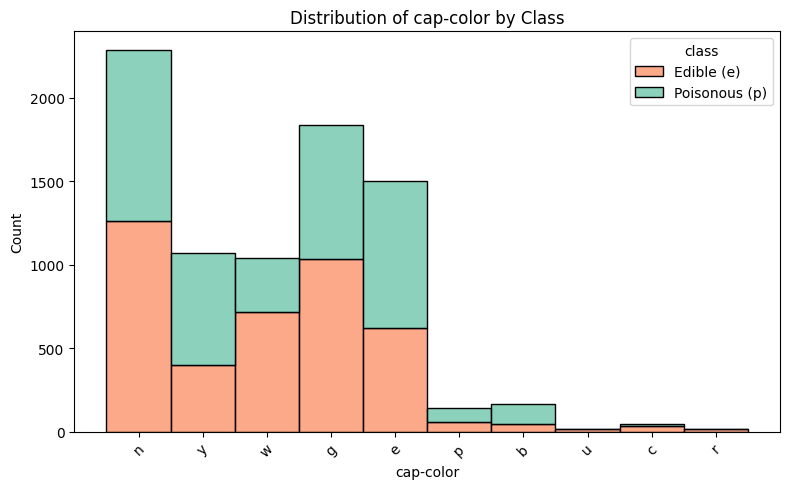

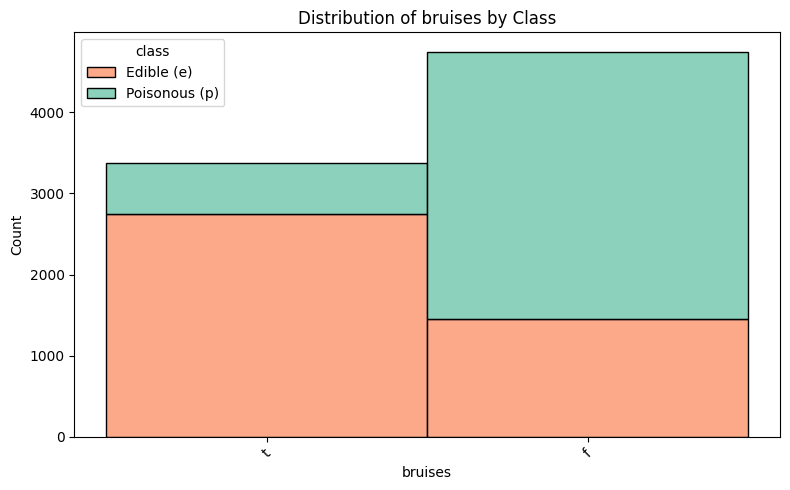

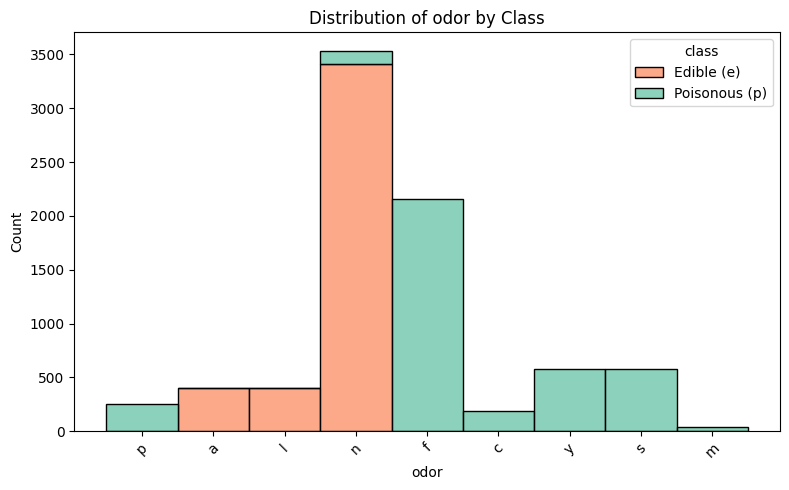

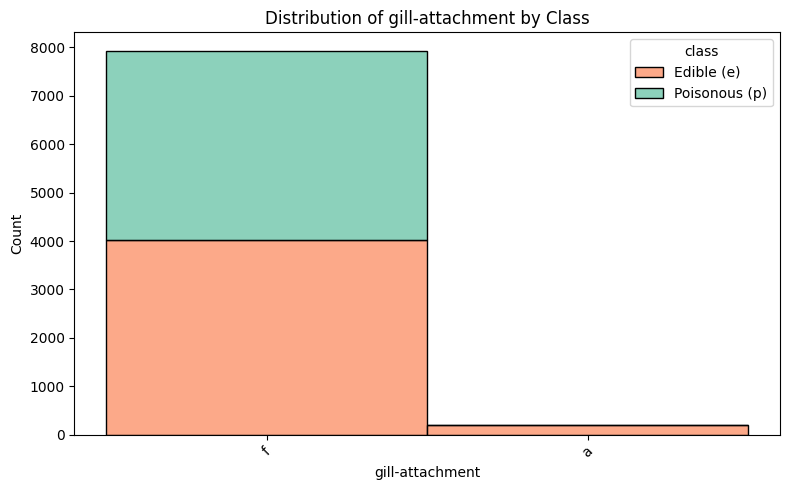

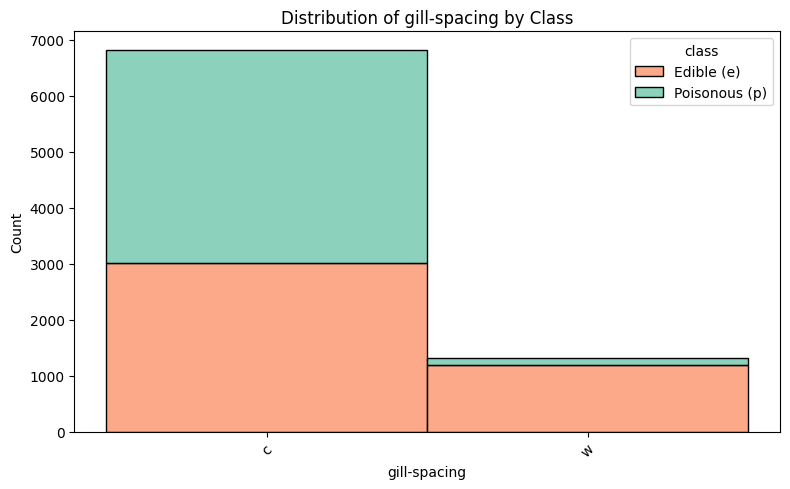

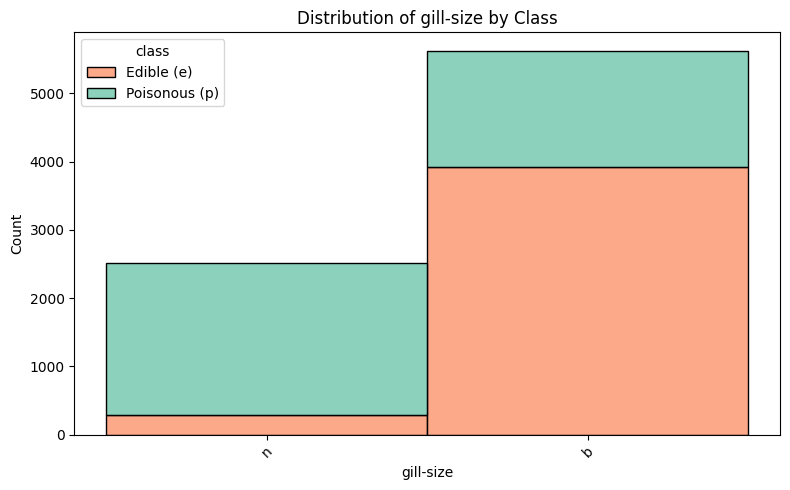

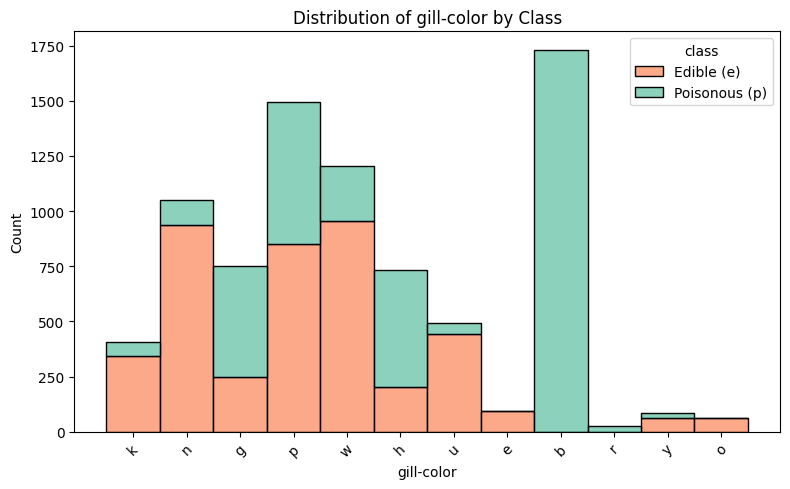

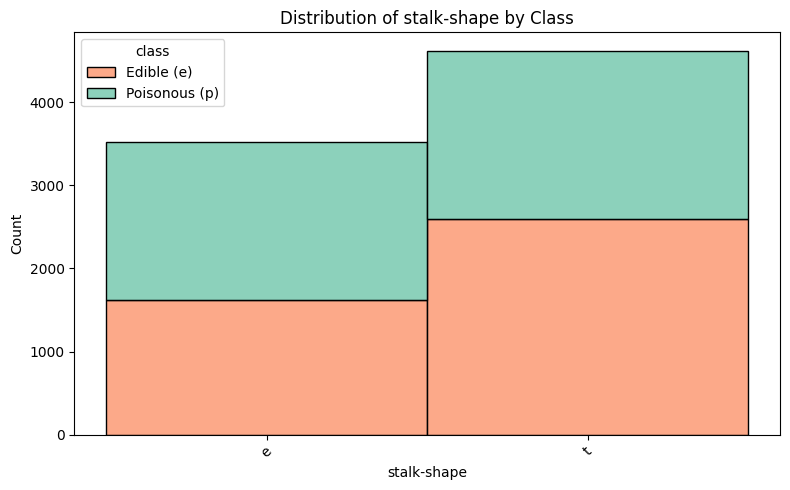

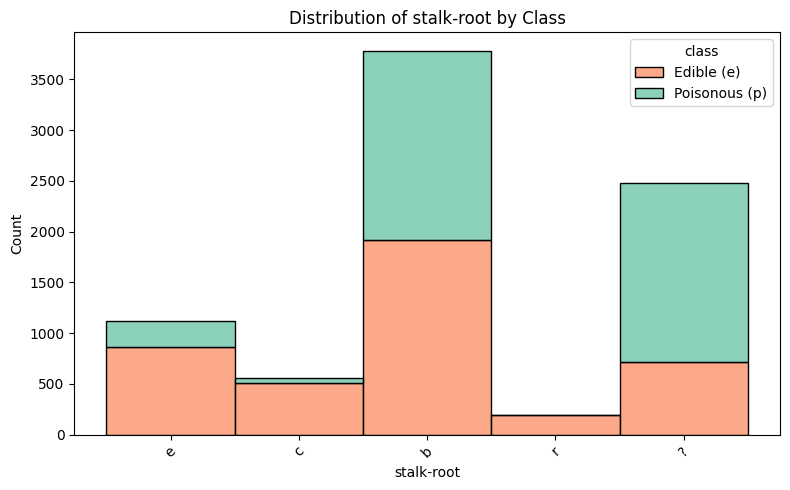

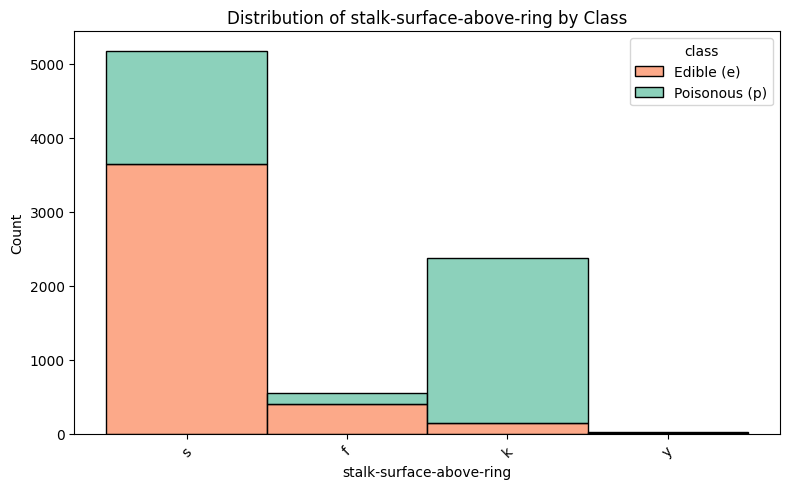

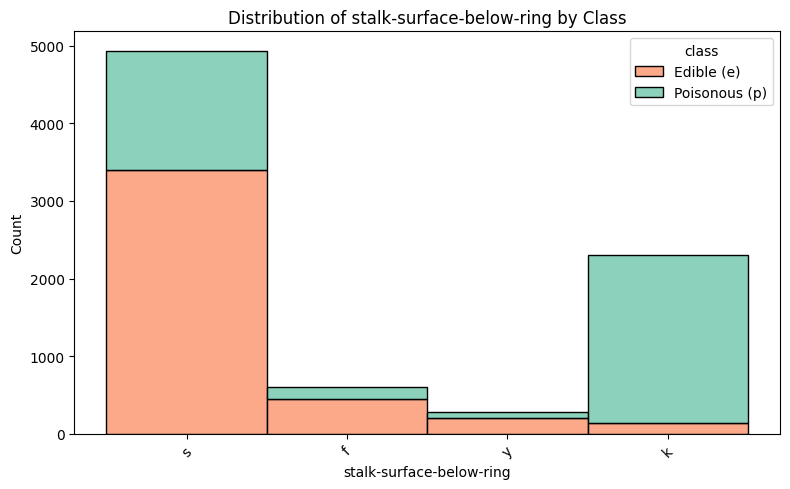

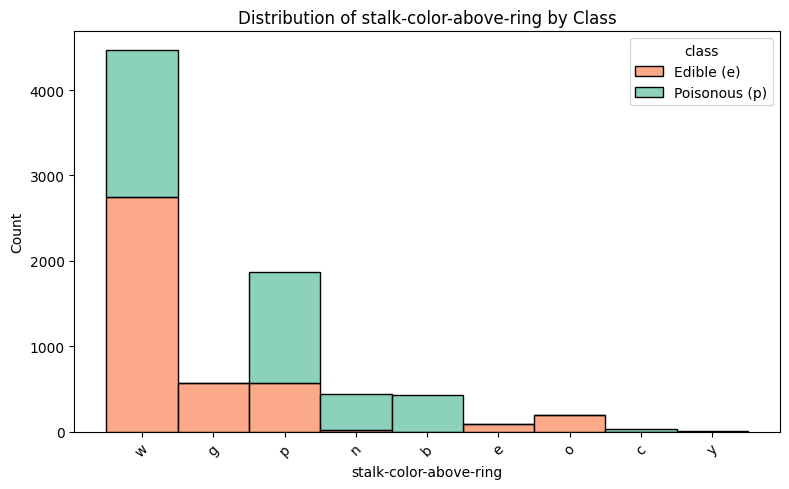

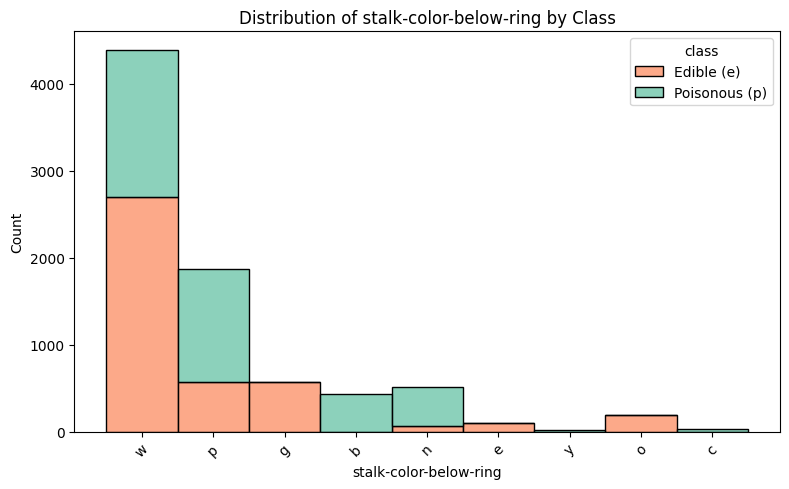

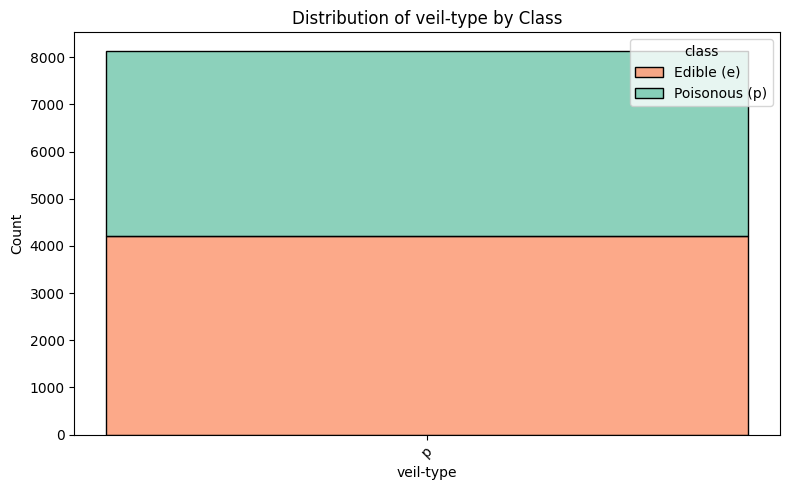

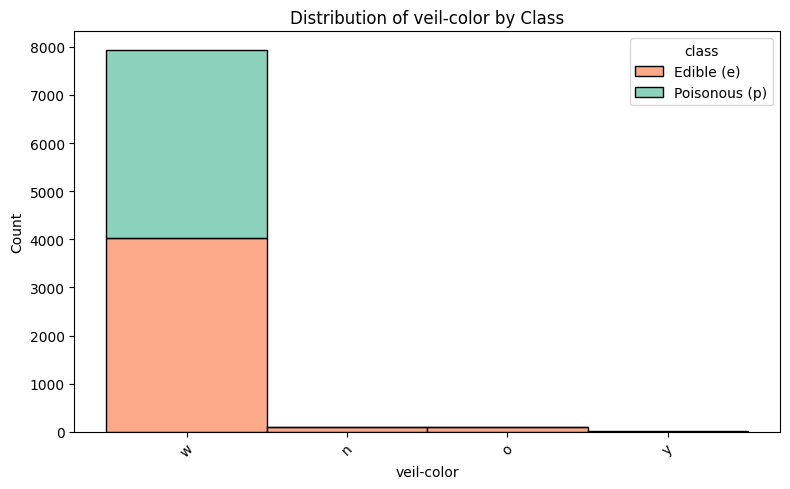

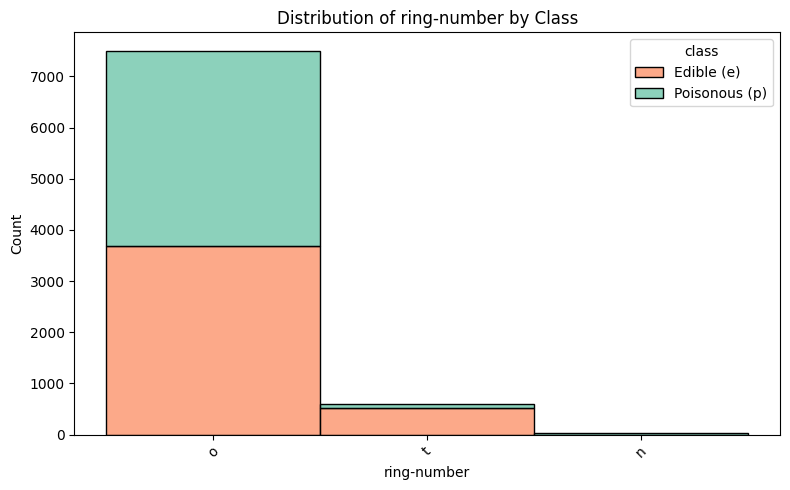

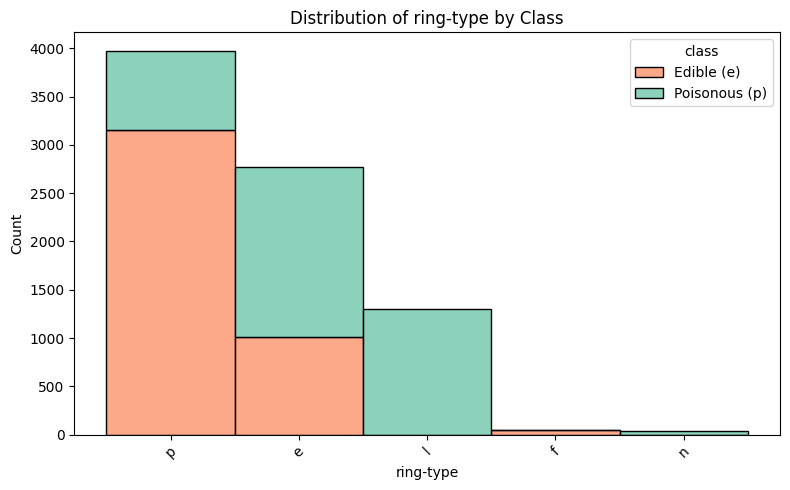

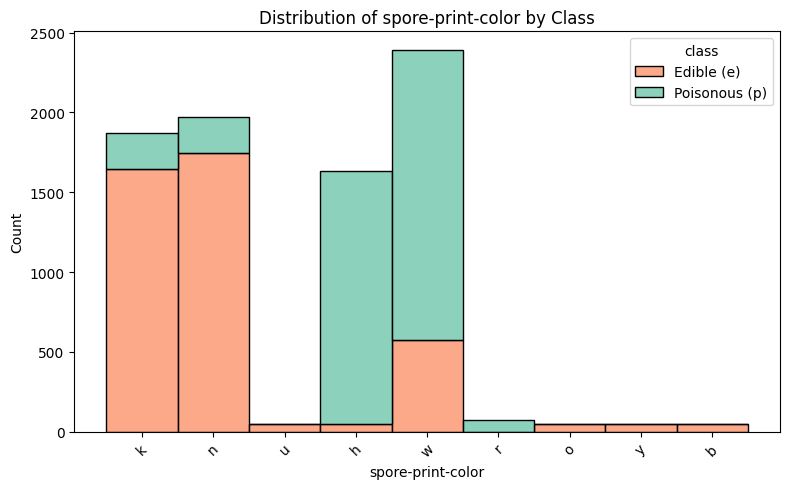

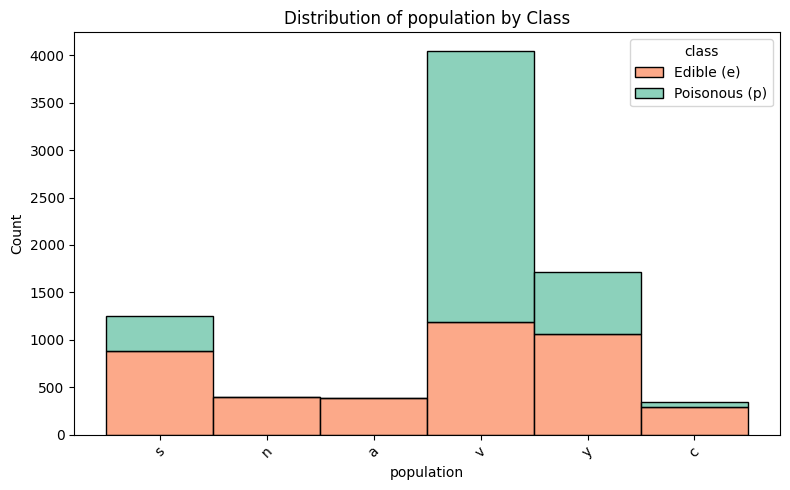

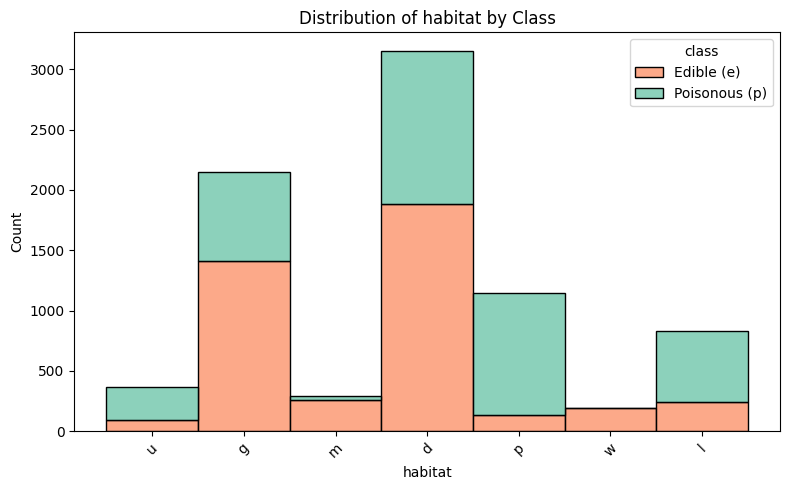

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot histograms for categorical features
def plot_feature_histograms(df, target_column):
    features = [col for col in df.columns if col != target_column]
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.histplot(data=df, x=feature, hue=target_column, multiple="stack", palette="Set2")
        plt.title(f"Distribution of {feature} by Class")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.legend(title=target_column, labels=['Edible (e)', 'Poisonous (p)'])
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Call the function to plot histograms
plot_feature_histograms(df, target_column="class")

### Organized Observations and Conclusions

#### 1. **Cap Shape**
- **Values:** Bell (b), Conical (c), Convex (x), Flat (f), Knobbed (k), Sunken (s).
- **Observations:**
  - Convex (x) and Flat (f) dominate both classes, with significant overlap.
  - Knobbed (k) is more common in poisonous, while Bell (b) leans toward edibility.
  - Sunken (s) and Conical (c) are rare and less useful.
- **Conclusion:** Cap shape has limited predictive power unless combined with other features.

---

#### 2. **Cap Surface**
- **Values:** Fibrous (f), Grooves (g), Scaly (y), Smooth (s).
- **Observations:**
  - Scaly (y) and Smooth (s) are common across both classes, providing minimal distinction.
  - Grooves (g) and Fibrous (f) are rare and less significant.
- **Conclusion:** Cap surface contributes little to classification.

---

#### 3. **Cap Color**
- **Values:** Brown (n), Yellow (y), White (w), others.
- **Observations:**
  - Yellow (y) indicates poisonous mushrooms, while White (w) suggests edibility.
  - Other colors like Gray (g), Red (e), and rare ones have minimal predictive utility.
- **Conclusion:** Moderate predictors include Yellow (y) and White (w).

---

#### 4. **Bruises**
- **Values:** Bruises (t), No bruises (f).
- **Observations:** 
  - Bruised mushrooms lean toward edibility, while no bruises suggest poison.
- **Conclusion:** A strong predictor for classification.

---

#### 5. **Odor**
- **Values:** Various.
- **Observations:** 
  - Edible: None (n), Almond (a), Anise (l).
  - Poisonous: Creosote (c), Foul (f), Musty (m), etc.
- **Conclusion:** The most important classification feature.

---

#### 6. **Gill Features**
- **Gill Attachment:** Limited utility.
- **Gill Spacing:** Close (c) aligns with poisonous, Crowded (w) with edible.
- **Gill Size:** Strong predictor; Broad (b) for edible, Narrow (n) for poisonous.

---

#### 7. **Stalk Color**
- **Observation:** Pink (p) indicates poisonous mushrooms. White (w) dominates but offers minimal distinction.
- **Conclusion:** Pink is useful; others are less so.

---

#### 8. **Veil and Ring**
- **Veil Type:** No utility.
- **Veil Color:** Dominated by White (w), offering limited insight.
- **Ring Number:** Minimal distinction.
- **Ring Type:** Useful; Pendant (p) for edible, Evanescent (e) for poisonous.

---

#### 9. **Spore-Print Color**
- **Observation:** White (w) indicates poison, Brown (n) and Chocolate (h) for edibility.
- **Conclusion:** Strong predictive power.

---

#### 10. **Population and Habitat**
- **Population:** Solitary (y) and Scattered (s) for edible; Several (v) for poisonous.
- **Habitat:** Grasses (g) and Woods (d) suggest edibility, though overall impact is low.
- **Conclusion:** Moderate predictive potential.

## Data Cleaning

Handle Missing Values
-Ensuring no missing values exist in the target (class).
-Replacing ? in the stalk-root column with NaN and evaluating missing data.

In [9]:
import numpy as np
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values, if any
print("Missing values in each column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found in the dataset.")

Missing values in each column:
stalk-root    2480
dtype: int64


Previous histogram analysis showed that stalk-root does not have a strong discriminatory power, therefore it can be safely dropped to avoid introducing potential bias.

In addition, veil-type also has only one unique value and adds no predictive power so we can drop this column too.


In [10]:
# Drop 'stalk-root' and 'veil-type' 
df = df.drop(columns=['stalk-root', 'veil-type'])

# Display the shape of the updated dataset
print(f"Dataset shape after dropping 'stalk-root' and 'veil-type': {df.shape}")


Dataset shape after dropping 'stalk-root' and 'veil-type': (8124, 21)


### One-Hot Encoding

In [13]:
# Separate features (X) and target (y)
X = df.drop(columns=['class'])
y = df['class']

# Perform one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Display the shape of the dataset after encoding
print(f"Shape of dataset after one-hot encoding: {X_encoded.shape}")

# Inspect the first few rows of the encoded dataset
X_encoded.head()

Shape of dataset after one-hot encoding: (8124, 91)


,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


Recombine with Target Variable

In [15]:
df_encoded = pd.concat([X_encoded, y], axis=1)

Remove Unneeded Columns:

In [16]:
df_encoded = df_encoded.drop_duplicates()

Encode the Target Variable: mapping the target variable class from {'e', 'p'} to numerical values

In [17]:
y = y.map({'e': 0, 'p': 1})

Split the Dataset:

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Training a Machine Learning Algorithm

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Evaluate on Validation Set:

In [20]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on validation set
y_val_pred = model.predict(X_val)

# Evaluate
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       636
           1       1.00      1.00      1.00       583

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



Evaluate on Test Set

In [21]:
# Predict on test set
y_test_pred = model.predict(X_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       621
           1       1.00      1.00      1.00       598

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



Achieving 100% accuracy can sometimes indicate overfitting, where the model memorizes the training data instead of generalizing to unseen data. Let's evaluate the model on the test set to ensure it performs equally well on completely unseen data.

In [22]:
y_test_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 1.0

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       621
           1       1.00      1.00      1.00       598

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



Let's use k-fold cross-validation to test the model on multiple subsets of the data:

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_encoded, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.92123077 1.         1.         1.         0.98522167]
Mean Accuracy: 0.9812904888215233


### Feature Importance Analysis

In [25]:
feature_importances = model.feature_importances_
feature_names = X_encoded.columns
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance}")

cap-shape_c: 0.0014043189195193035
cap-shape_f: 0.0
cap-shape_k: 0.0
cap-shape_s: 0.0
cap-shape_x: 0.0
cap-surface_g: 0.0007030353343457005
cap-surface_s: 0.0
cap-surface_y: 0.0
cap-color_c: 0.0
cap-color_e: 0.0
cap-color_g: 0.0
cap-color_n: 0.0
cap-color_p: 0.0
cap-color_r: 0.0
cap-color_u: 0.0
cap-color_w: 0.0
cap-color_y: 0.0
bruises_t: 0.16170930160421768
odor_c: 0.0
odor_f: 0.0
odor_l: 0.0
odor_m: 0.0
odor_n: 0.6301374723327108
odor_p: 0.09015187539594646
odor_s: 0.0
odor_y: 0.0
gill-attachment_f: 0.0
gill-spacing_w: 0.0
gill-size_n: 1.9702317550677812e-05
gill-color_e: 0.0
gill-color_g: 0.0
gill-color_h: 0.0
gill-color_k: 0.0
gill-color_n: 0.0
gill-color_o: 0.0
gill-color_p: 0.0
gill-color_r: 0.0
gill-color_u: 0.0
gill-color_w: 0.0
gill-color_y: 0.0
stalk-shape_t: 0.0
stalk-surface-above-ring_k: 0.0
stalk-surface-above-ring_s: 0.0
stalk-surface-above-ring_y: 0.0
stalk-surface-below-ring_k: 0.0
stalk-surface-below-ring_s: 0.0
stalk-surface-below-ring_y: 0.013227635927362796
stalk-

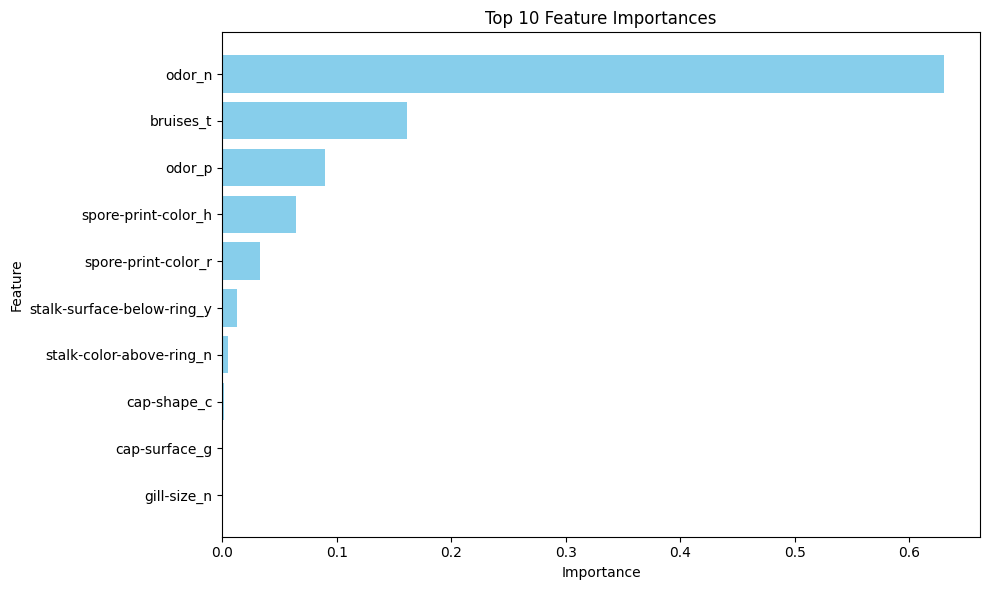

In [27]:
# Sort features by importance
sorted_idx = feature_importances.argsort()[-10:]  # Top 10 features
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

Let's experiment with other algorithm:

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_test_rf_pred = rf_model.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_test_rf_pred))

Random Forest Test Accuracy: 1.0


Let's use simpler model to validate whether the dataset's patterns are straightforward enough for basic algorithms to succeed

In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Evaluate on the test set
y_test_log_pred = logistic_model.predict(X_test)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_test_log_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_log_pred))

Logistic Regression Test Accuracy: 0.9983593109105825

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       621
           1       1.00      1.00      1.00       598

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [30]:
feature_contributions = pd.Series(logistic_model.coef_[0], index=X_train.columns)
print(feature_contributions.sort_values(ascending=False))

spore-print-color_r    4.845859
odor_c                 4.017160
gill-size_n            3.903095
odor_f                 3.900308
odor_p                 3.115324
                         ...   
spore-print-color_n   -2.057781
spore-print-color_u   -2.091816
gill-spacing_w        -2.226963
ring-type_f           -2.231612
odor_n                -3.754931
Length: 91, dtype: float64
